# Week 8 - Logistic Regression and Clustering
## Week 8 Logistic Regression Questions

Logistic Regression:

1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall
2. Do the same analysis for other columns
3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)
4. Plot ROC Curves for each model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [3]:

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


### Q1 . Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    predictions = (probs >= threshold).astype(int)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.79, Recall: 0.69
Threshold: 0.40, Accuracy: 0.74, Precision: 0.78, Recall: 0.44
Threshold: 0.50, Accuracy: 0.74, Precision: 0.86, Recall: 0.38
Threshold: 0.60, Accuracy: 0.74, Precision: 1.00, Recall: 0.31
Threshold: 0.70, Accuracy: 0.70, Precision: 1.00, Recall: 0.19


### Q2. Do the same analysis for other columns

In [7]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)
        
        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Unde

Element:RI, Threshold: 0.30, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.63, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.77, Precision: 0.71, Recall: 0.62
Element:Na, Threshold: 0.40, Accuracy: 0.81, Precision: 0.83, Recall: 0.62
Element:Na, Threshold: 0.50, Accuracy: 0.81, Precision: 0.90, Recall: 0.56
Element:Na, Threshold: 0.60, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Na, Threshold: 0.70, Accuracy: 0.72, Precision: 0.83, Recall: 0.31
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.88, Recall: 0.88
Element:Mg, Threshold: 0.40, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.85, Recall: 0.69
Element:Mg, Threshold: 0.

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Unde

### Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [8]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8837209302325582


### Q4. Plot ROC Curves for each model.

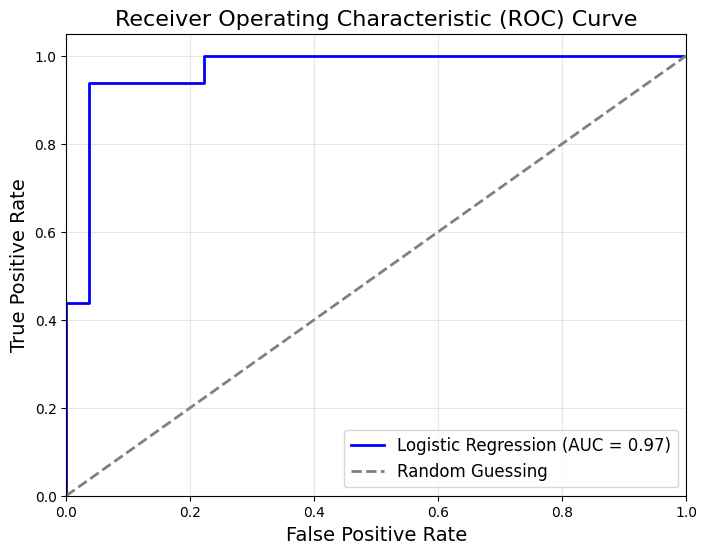

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)  # Adjust pos_label as necessary for your case
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


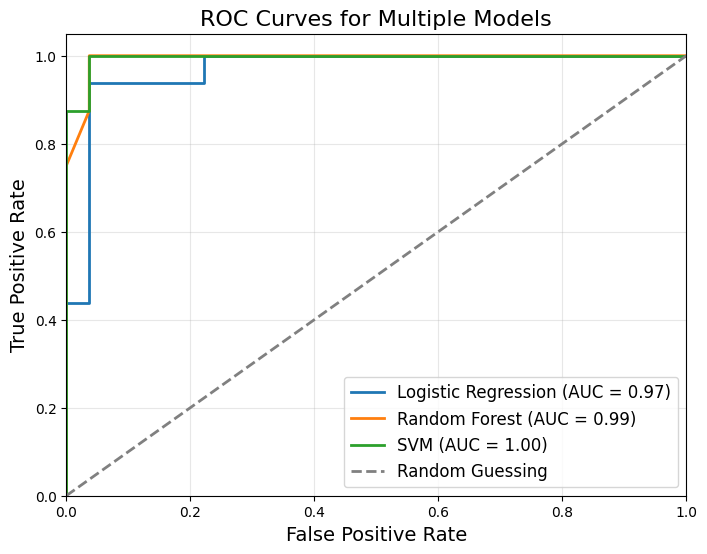

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Ensure SVM outputs probabilities
}

# Prepare the ROC plot
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    # Create pipeline with the model
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve for this model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add random guessing line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Multiple Models', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# Week 8 - Logistic Regression and Clustering
## Week 8 Clustering Questions

Clustering:

1. Repeat the above exercise for different values of k
    a. How do the inertia and silhouette scores change?
    b. What if you don't scale your features?
    c. Is there a 'right' k? Why or why not?

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [13]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


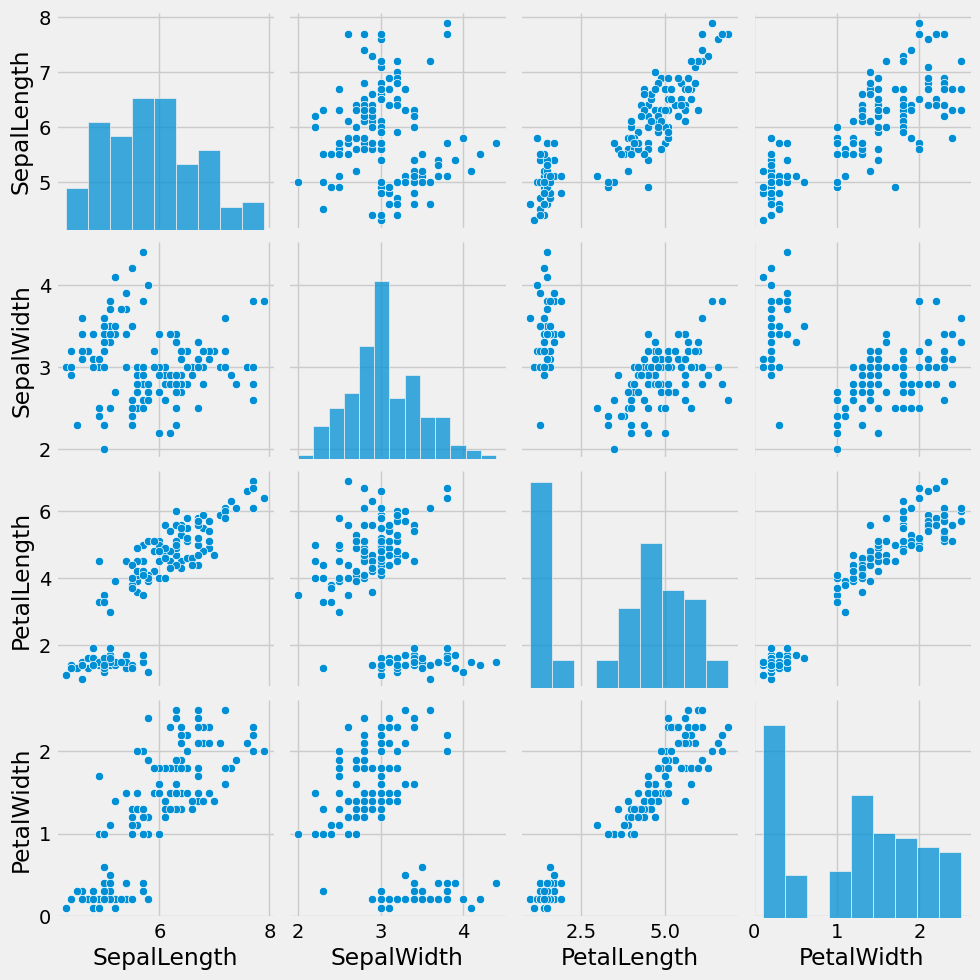

In [14]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [15]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [16]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [17]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [18]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [19]:
print(labels,centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [[0.545      0.36333333 0.6620339  0.65666667]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


In [20]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

np.float64(0.6294675561906644)

In [21]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

Text(0, 0.5, 'Score')

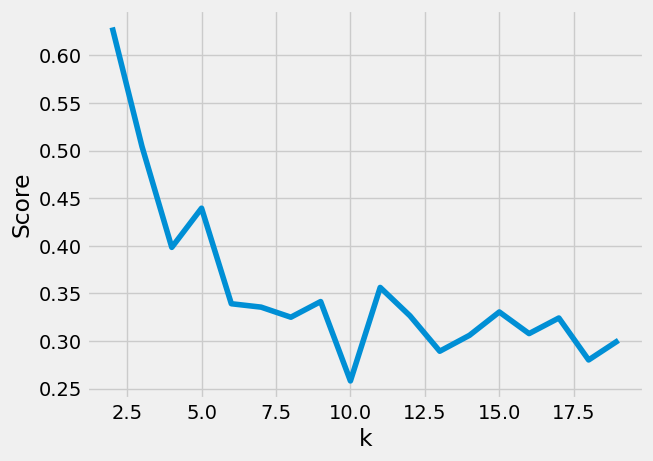

In [22]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [23]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

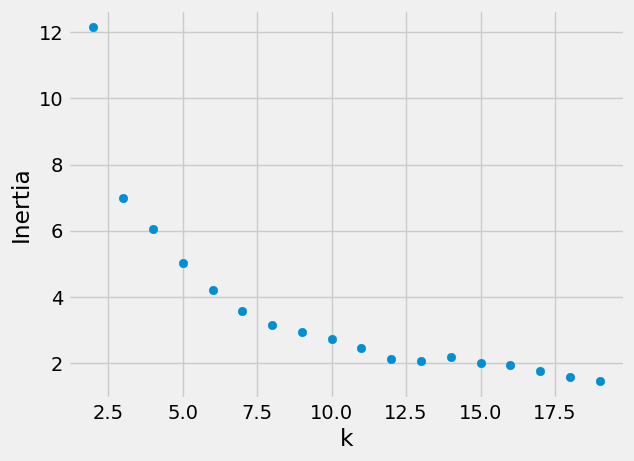

In [24]:
plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

In [25]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,6
2,4.7,3.2,1.3,0.2,Iris-setosa,6
3,4.6,3.1,1.5,0.2,Iris-setosa,6
4,5.0,3.6,1.4,0.2,Iris-setosa,1


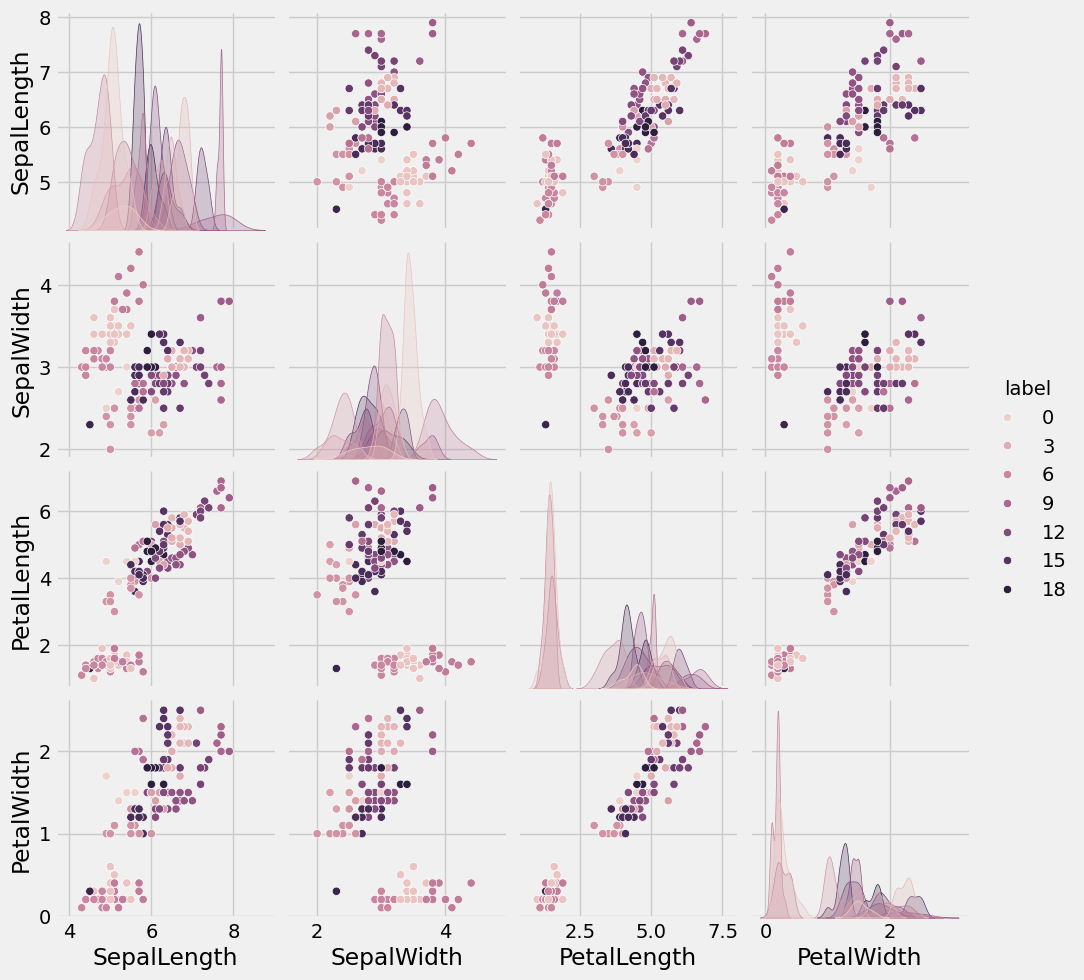

In [26]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

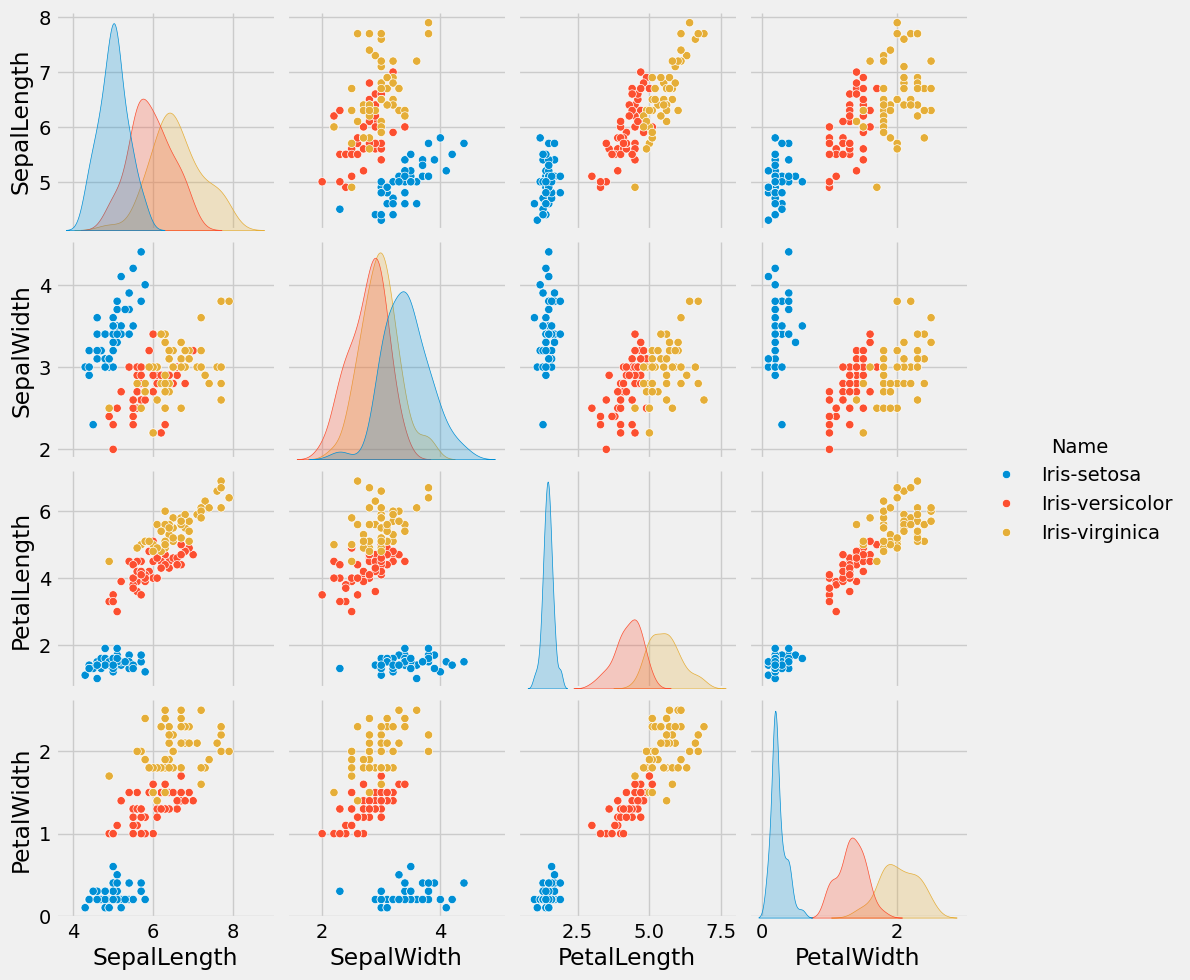

In [27]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

### Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?

In [32]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [33]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [34]:
print(labels,centroids)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0] [[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]]


In [35]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

np.float64(0.5043188549150884)

1. How do the inertia and silhouette scores change?
Inertia:
When k=2, the data points are grouped into two clusters, leading to a relatively lower inertia compared to higher values of k. However, the clusters are broader and less specific, meaning the centroids might not capture smaller patterns.
When k=3, the inertia decreases further because the data is divided into more groups, which reduces the distance of data points from their centroids. However, diminishing returns can occur as k increases.
Silhouette Score:
For k=2, the silhouette score is 0.629, which indicates that clusters are reasonably well-separated and compact.
For k=3, the silhouette score drops to 0.504, reflecting weaker separation between clusters. This could mean that increasing k begins to split some natural groupings into less coherent subgroups.
2. What if you don't scale your features?
Without scaling, clustering may become biased:
Features with larger numerical ranges will dominate the distance computations (e.g., in the Euclidean metric), leading to clusters that are more influenced by these features.
The silhouette score might not provide meaningful insights since the clusters will likely reflect the scaling imbalance rather than the inherent structure of the data.
Scaling ensures that each feature contributes equally to clustering, making results more accurate and interpretable.
3. Is there a 'right' k? Why or why not?
In this scenario, the silhouette score for k=2 is above 0.6, indicating well-separated and compact clusters. As k increases, the silhouette score decreases significantly (e.g., 0.45 for k=3), suggesting weaker cluster separation.